In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # This import should now work correctly
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# XGBoost Library
import xgboost as xgb

# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras_tuner as kt



# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
!pip install scikeras


In [ ]:
# -------------- Step 1: Load and Explore the Data --------------
# Load the dataset (Adjust the path as necessary)
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


Remove the Outlier for Smoking

In [ ]:
# Step 1: Inspect unique values in the 'smoking' column to confirm the outlier
print("Unique values before removing the outlier:", data['smoking'].unique())

# Step 2: Remove the outlier (rows where smoking == 4.860753)
data_cleaned = data[data['smoking'] != 4.860753]

# Step 3: Verify the outlier is removed
print("Unique values after removing the outlier:", data_cleaned['smoking'].unique())

# Optional: If you want to overwrite 'data' with the cleaned version, use:
data = data_cleaned

# If needed, you can save the cleaned data back to a file:
# data_cleaned.to_csv('cleaned_dataset.csv', index=False)


Unique values before removing the outlier: [3.       1.       2.       4.860753]
Unique values after removing the outlier: [3. 1. 2.]


Remove Outlier for Drinking

In [ ]:
# Step 1: Inspect unique values in the 'drinking' column to identify any outliers
print("Unique values before removing the outlier:", data['drinking'].unique())

# Step 2: Define valid categories for drinking status
valid_drinking_status = [1.0, 2.0, 3.0]

# Step 3: Remove rows with invalid (outlier) values in the 'drinking' column
data_cleaned = data[data['drinking'].isin(valid_drinking_status)]

# Step 4: Verify that the outliers are removed
print("Unique values after removing the outlier:", data_cleaned['drinking'].unique())

# Optional: If you want to overwrite 'data' with the cleaned version, use:
data = data_cleaned

# Optional: Save the cleaned data if needed
# data_cleaned.to_csv('cleaned_dataset.csv', index=False)


Unique values before removing the outlier: [3. 1. 2.]
Unique values after removing the outlier: [3. 1. 2.]


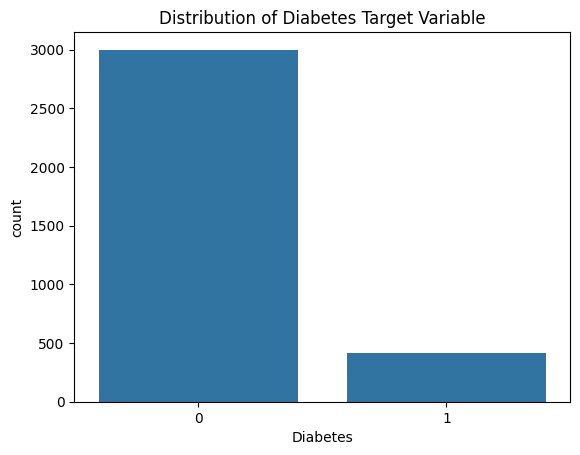

In [ ]:
# Visualize target variable distribution
sns.countplot(x='Diabetes', data=data)
plt.title('Distribution of Diabetes Target Variable')
plt.show()

In [ ]:
# Check the class distribution in the original dataset
class_distribution_before = data['Diabetes'].value_counts()
class_distribution_before


,count
Diabetes,
0,3000
1,415


Exploratory Data Analysis (EDA)

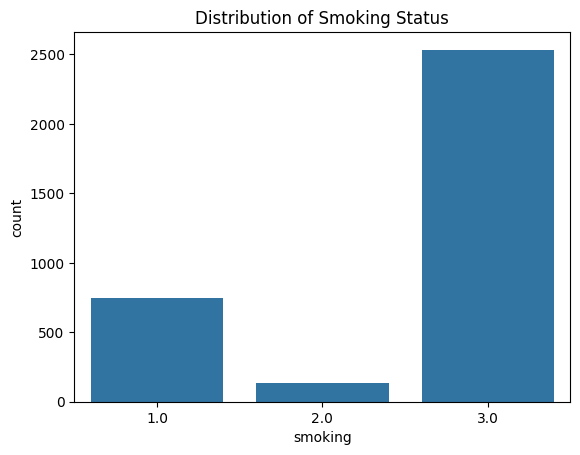

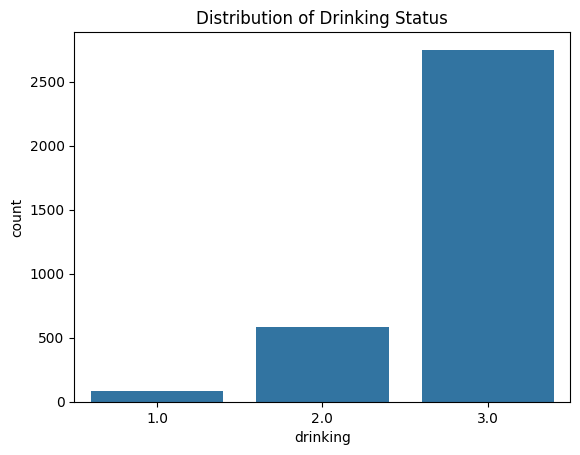

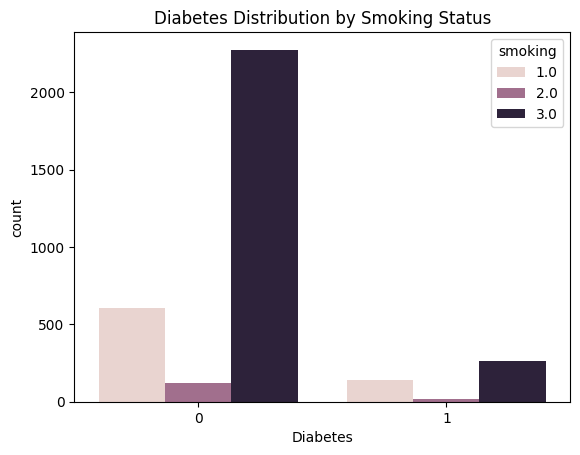

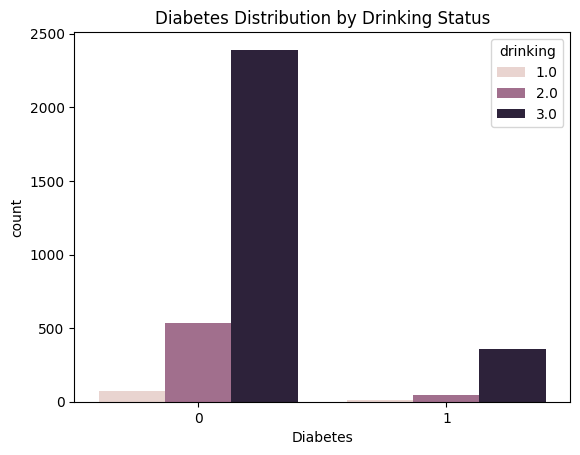

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Smoking Status
sns.countplot(x='smoking', data=data)
plt.title('Distribution of Smoking Status')
plt.show()

# Distribution of Drinking Status
sns.countplot(x='drinking', data=data)
plt.title('Distribution of Drinking Status')
plt.show()

# Distribution of Diabetes based on Smoking
sns.countplot(x='Diabetes', hue='smoking', data=data)
plt.title('Diabetes Distribution by Smoking Status')
plt.show()

# Distribution of Diabetes based on Drinking
sns.countplot(x='Diabetes', hue='drinking', data=data)
plt.title('Diabetes Distribution by Drinking Status')
plt.show()


Feature Importance Analysis

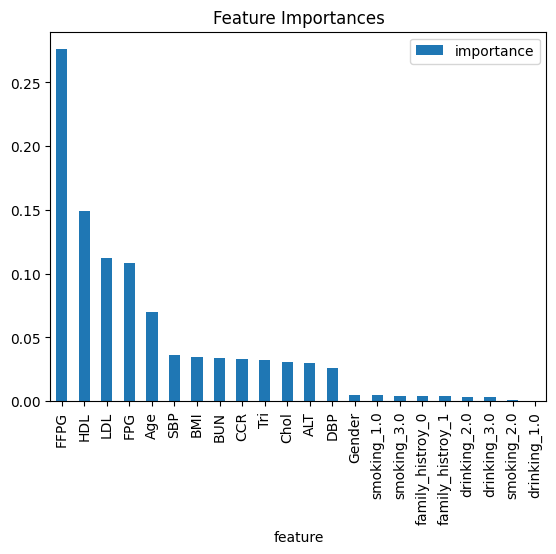

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       899
           1       0.82      0.63      0.72       126

    accuracy                           0.94      1025
   macro avg       0.89      0.81      0.84      1025
weighted avg       0.93      0.94      0.94      1025

[[882  17]
 [ 46  80]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the data
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']
X = pd.get_dummies(X, columns=['smoking', 'drinking', 'family_histroy'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# Plotting feature importance
importances.plot.bar()
plt.title('Feature Importances')
plt.show()

# Evaluate the model
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


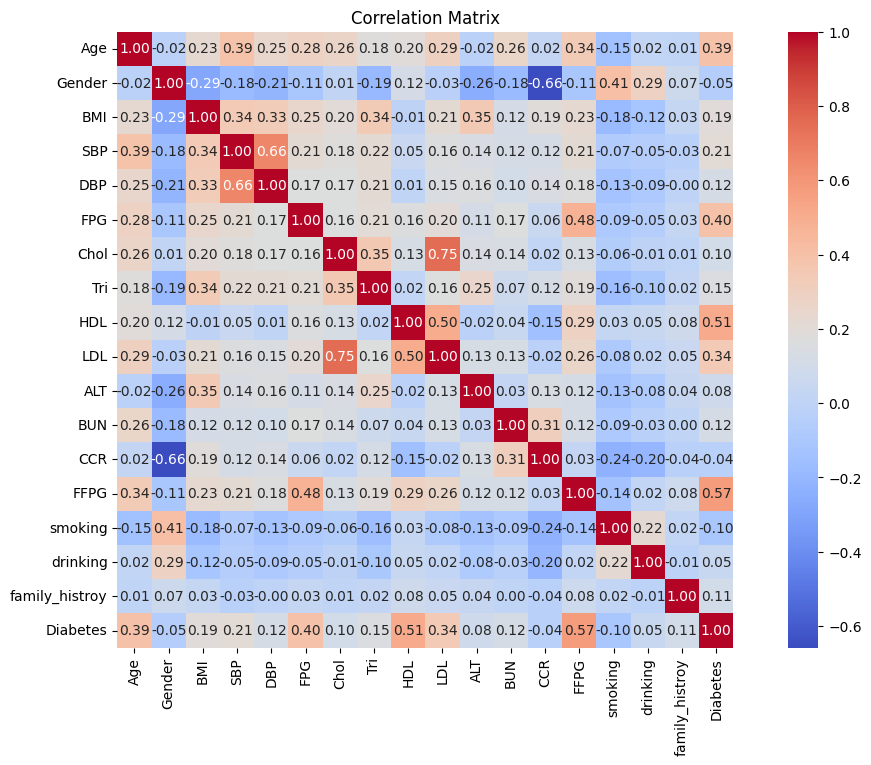

In [ ]:
# -------------- Step 2: Correlation Matrix --------------
# Calculate the correlation matrix
corr_matrix = data.corr()
# Plot the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

Investigate Outliers and Confounders
Step 1: Checking for Outliers in HDL and Age

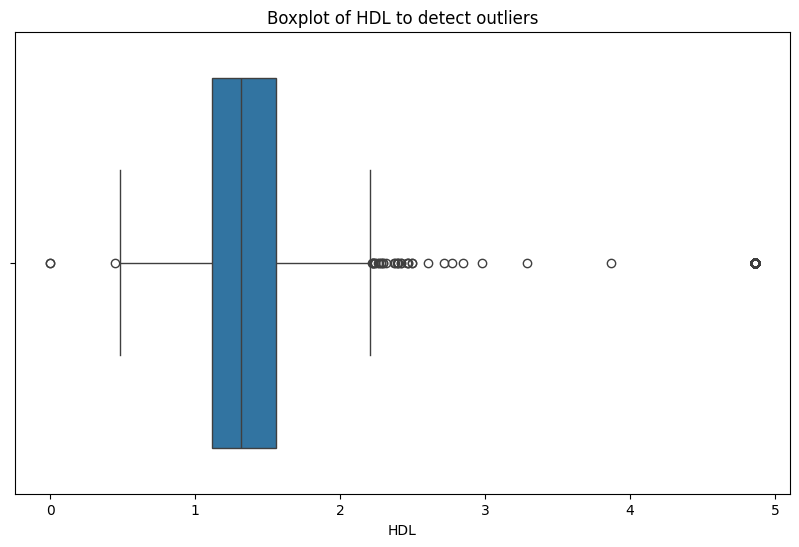

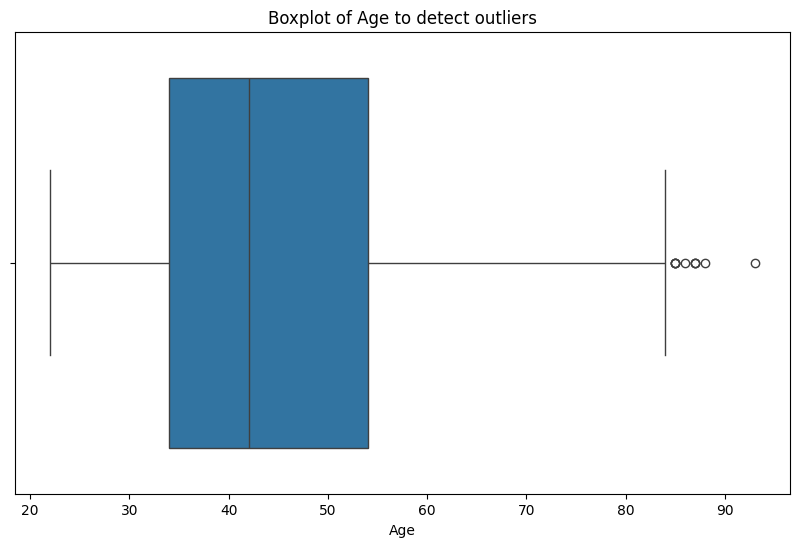

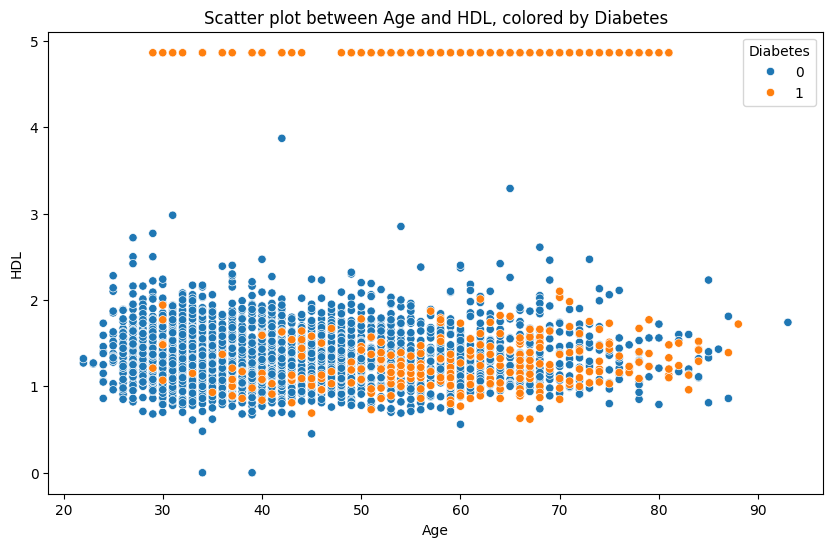

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Boxplot for HDL
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['HDL'])
plt.title("Boxplot of HDL to detect outliers")
plt.show()

# Step 2: Boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'])
plt.title("Boxplot of Age to detect outliers")
plt.show()

# Step 3: Scatter plot between HDL and Age to detect possible outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['HDL'], hue=data['Diabetes'])
plt.title("Scatter plot between Age and HDL, colored by Diabetes")
plt.show()


Step 2: Stratify the Data by Confounders

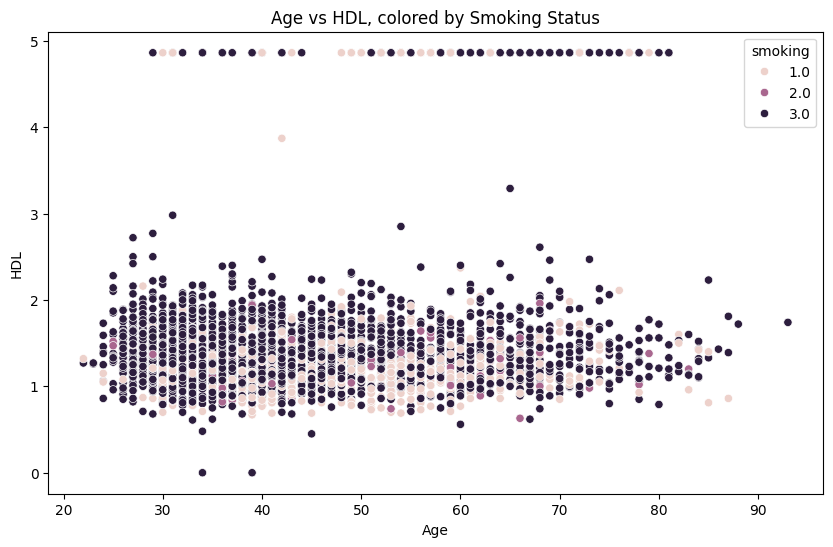

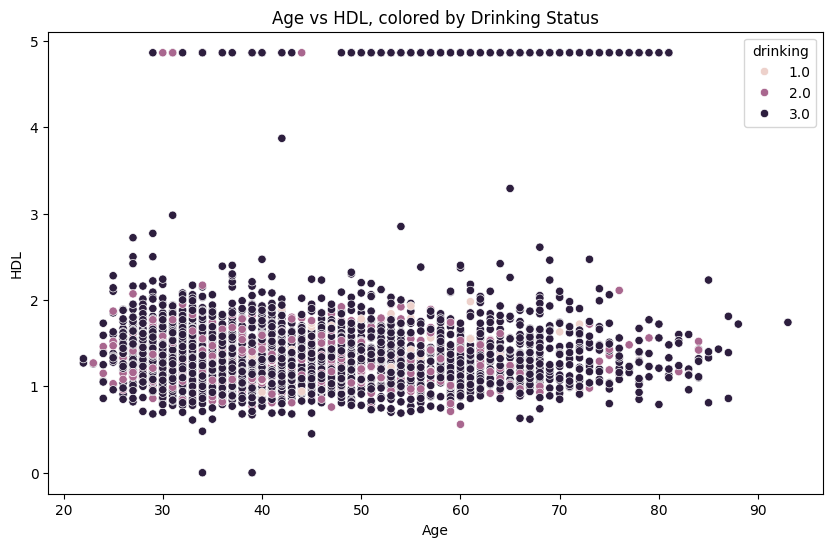

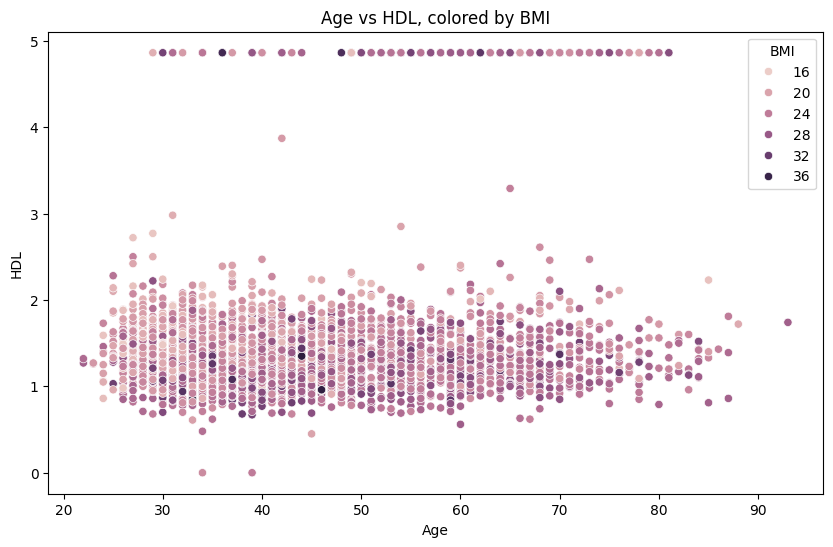

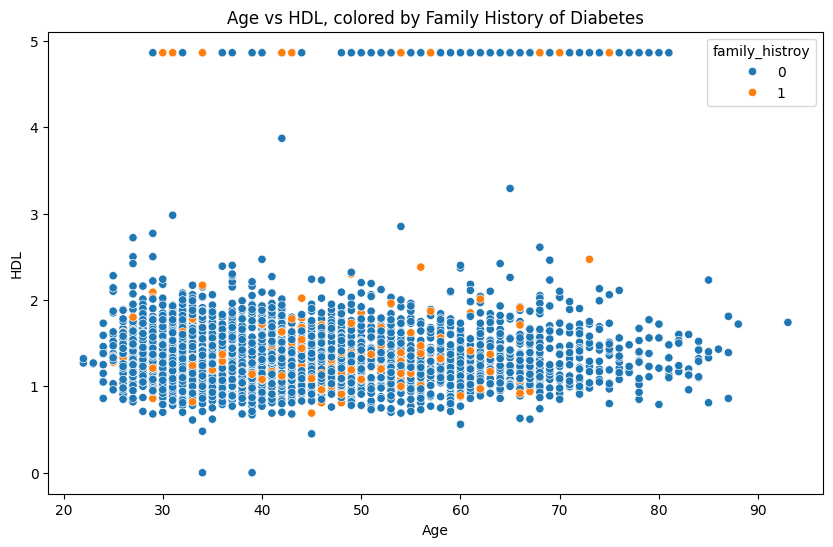

In [ ]:
# Step 1: Scatter plot of Age vs HDL, colored by Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['HDL'], hue=data['smoking'])
plt.title("Age vs HDL, colored by Smoking Status")
plt.show()

# Step 2: Scatter plot of Age vs HDL, colored by Drinking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['HDL'], hue=data['drinking'])
plt.title("Age vs HDL, colored by Drinking Status")
plt.show()

# Step 3: Scatter plot of Age vs HDL, colored by BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['HDL'], hue=data['BMI'])
plt.title("Age vs HDL, colored by BMI")
plt.show()

# Step 4: Scatter plot of Age vs HDL, colored by Family History of Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['HDL'], hue=data['family_histroy'])
plt.title("Age vs HDL, colored by Family History of Diabetes")
plt.show()


Step 3: Examine the Relationship between HDL, Age, and Diabetes

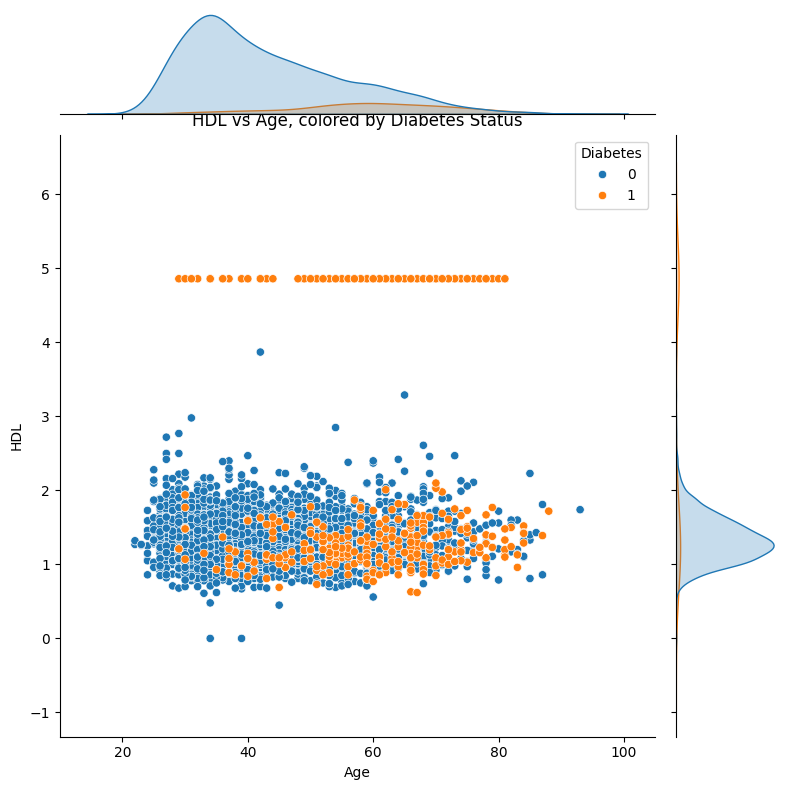

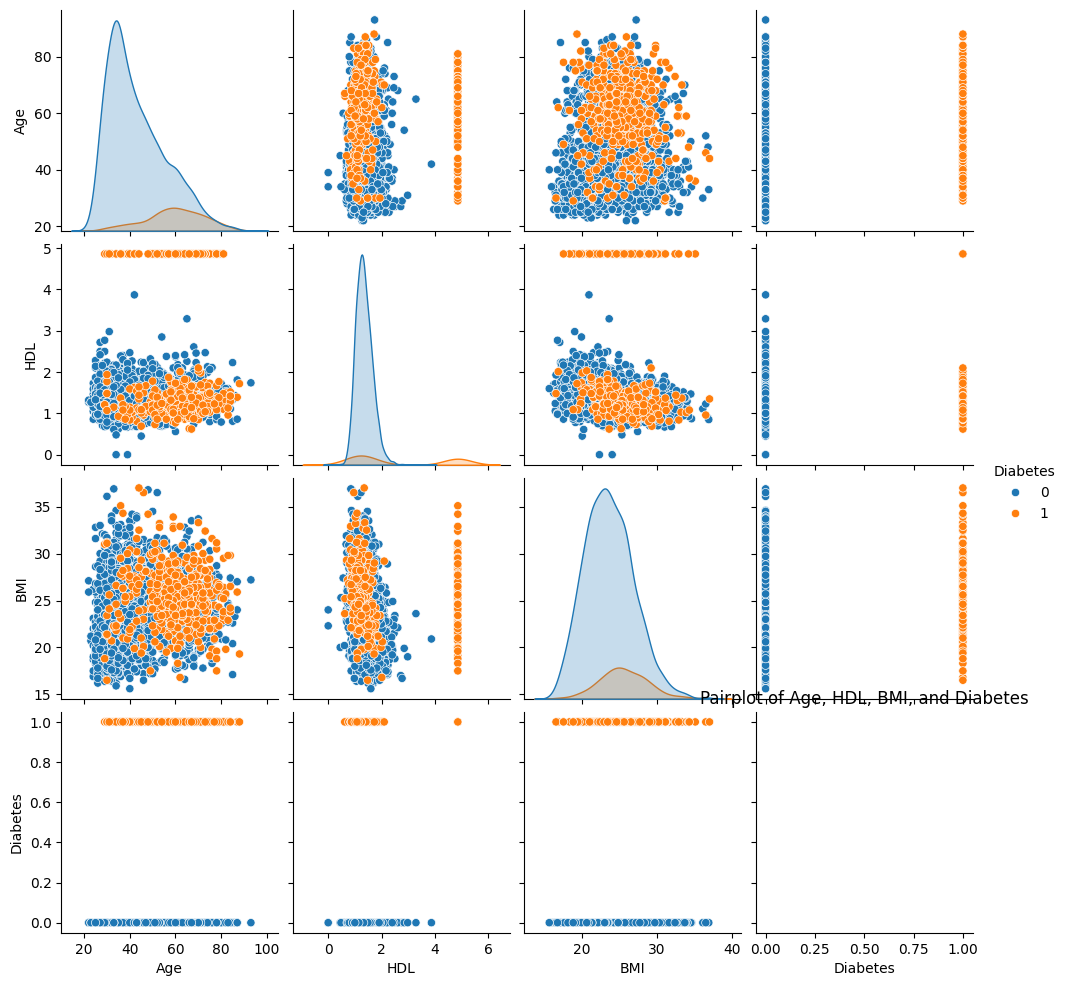

In [ ]:
# Step 1: Joint plot of HDL vs Age, showing the Diabetes status
sns.jointplot(x='Age', y='HDL', hue='Diabetes', data=data, kind="scatter", height=8)
plt.title("HDL vs Age, colored by Diabetes Status")
plt.show()

# Step 2: Pairplot of selected features (Age, HDL, Diabetes, BMI)
sns.pairplot(data, vars=['Age', 'HDL', 'BMI', 'Diabetes'], hue='Diabetes')
plt.title("Pairplot of Age, HDL, BMI, and Diabetes")
plt.show()


In [ ]:
# -------------- Step 3: Preprocessing and Feature Engineering --------------
# Separate features and target
X = data.drop(columns='Diabetes')
y = data['Diabetes']
# Preprocess the data by scaling all features uniformly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert scaled features back to DataFrame for better interpretability (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 2390
Testing samples: 1025


In [ ]:
# -------------- Step 4: Machine Learning Models --------------
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Initialize models with default parameters
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)
gbm = GradientBoostingClassifier(random_state=42)
from xgboost import XGBClassifier # import XGBClassifier from xgboost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       900
           1       0.88      0.63      0.73       125

    accuracy                           0.94      1025
   macro avg       0.91      0.81      0.85      1025
weighted avg       0.94      0.94      0.94      1025

Accuracy: 0.9444
ROC AUC Score: 0.9394
Confusion Matrix:
[[889  11]
 [ 46  79]]


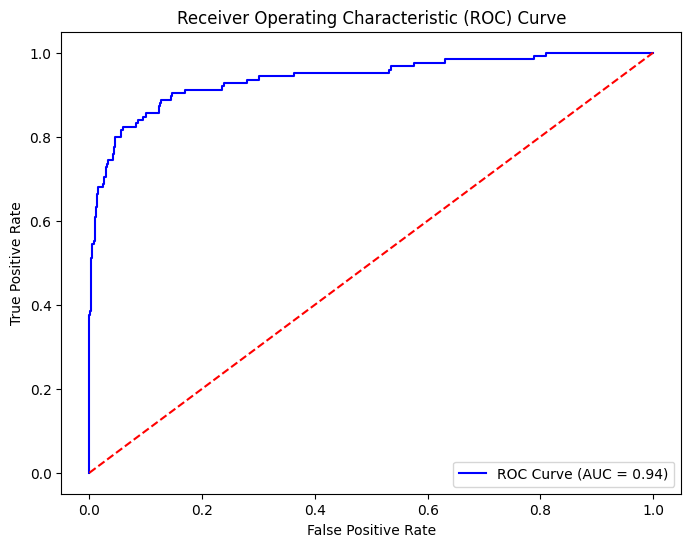

Feature Coefficients and Odds Ratios:
           Feature  Coefficient  Odds Ratio
13            FFPG     1.024129    2.784668
8              HDL     0.933523    2.543453
0              Age     0.925398    2.522873
5              FPG     0.711514    2.037074
9              LDL     0.615648    1.850855
15        drinking     0.386751    1.472189
16  family_histroy     0.292537    1.339823
7              Tri     0.255386    1.290960
10             ALT     0.241777    1.273510
3              SBP     0.139721    1.149953
11             BUN     0.121948    1.129695
2              BMI     0.063372    1.065424
4              DBP    -0.084028    0.919405
1           Gender    -0.196340    0.821732
14         smoking    -0.240866    0.785947
12             CCR    -0.265450    0.766861
6             Chol    -0.677501    0.507885


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 6: Interpret the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
coefficients['Odds Ratio'] = coefficients['Coefficient'].apply(lambda x: np.exp(x))
coefficients = coefficients.sort_values(by='Odds Ratio', ascending=False)
print("Feature Coefficients and Odds Ratios:")
print(coefficients)

Random Forest:


Random Forest Performance:
Accuracy: 0.9454
Precision: 0.8286
Recall: 0.6960
F1 Score: 0.7565
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.83      0.70      0.76       125

    accuracy                           0.95      1025
   macro avg       0.89      0.84      0.86      1025
weighted avg       0.94      0.95      0.94      1025



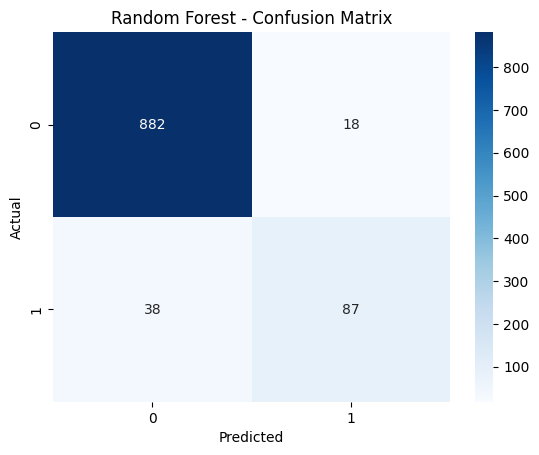

In [ ]:
# Train Random Forest
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

Decision Tree:


Decision Tree Performance:
Accuracy: 0.9200
Precision: 0.6617
Recall: 0.7040
F1 Score: 0.6822
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       900
           1       0.66      0.70      0.68       125

    accuracy                           0.92      1025
   macro avg       0.81      0.83      0.82      1025
weighted avg       0.92      0.92      0.92      1025



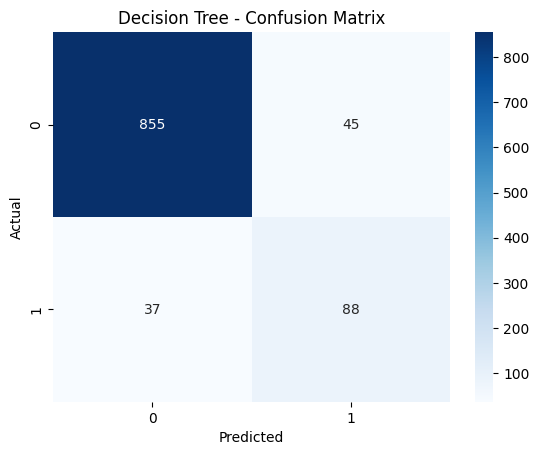

In [ ]:
# Train Decision Tree
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")

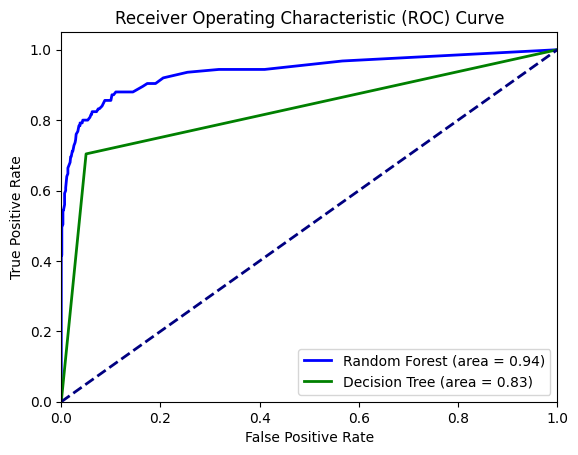

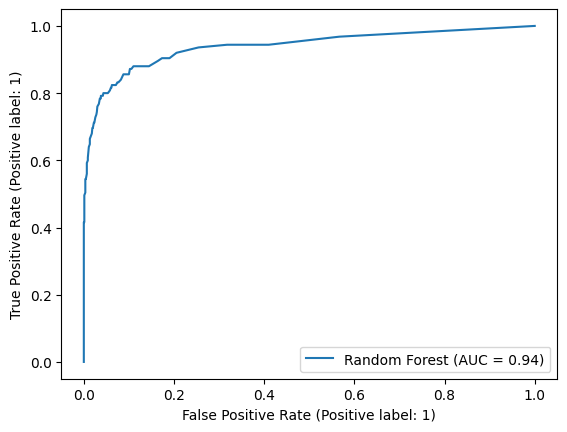

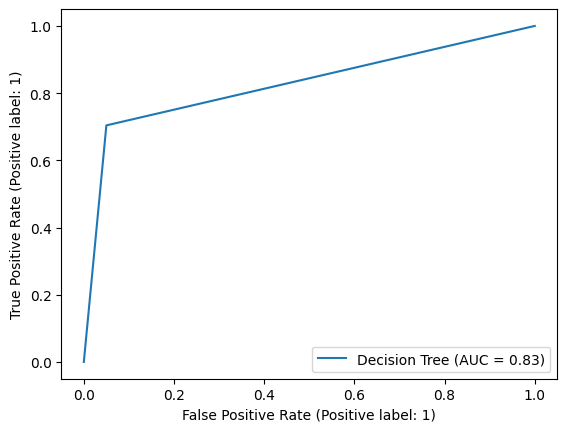

In [ ]:
# Train Decision Tree
dt.fit(X_train, y_train)  # Fit the Decision Tree model before making predictions

#Import the metrics module from sklearn
from sklearn import metrics

# Step 1: Predict the probabilities for the positive class for both models
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Random Forest probabilities
y_prob_dt = dt.predict_proba(X_test)[:, 1]  # Decision Tree probabilities

# Step 2: Compute the ROC curve for both models
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_prob_rf) #Use the roc_curve function from the metrics module
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, y_prob_dt) #Use the roc_curve function from the metrics module

# Step 3: Compute the AUC for both models
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf) #Use the auc function from the metrics module
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt) #Use the auc function from the metrics module

# Step 4: Plot the ROC curve for both models
plt.figure()

# ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

# ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Alternatively, using RocCurveDisplay for both models
metrics.RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest') #Use the RocCurveDisplay function from the metrics module
metrics.RocCurveDisplay.from_estimator(dt, X_test, y_test, name='Decision Tree') #Use the RocCurveDisplay function from the metrics module
plt.show()

SVM:


Support Vector Machine Performance:
Accuracy: 0.9424
Precision: 0.8511
Recall: 0.6400
F1 Score: 0.7306
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       900
           1       0.85      0.64      0.73       125

    accuracy                           0.94      1025
   macro avg       0.90      0.81      0.85      1025
weighted avg       0.94      0.94      0.94      1025



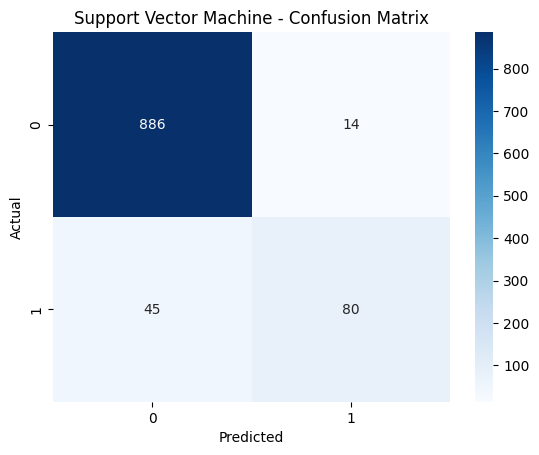

In [ ]:
# Train SVM
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "Support Vector Machine")

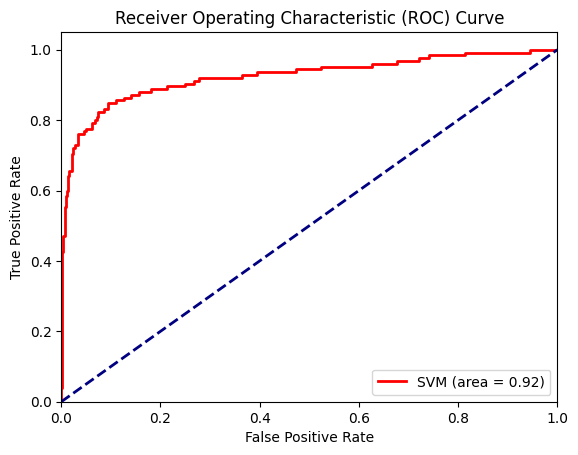

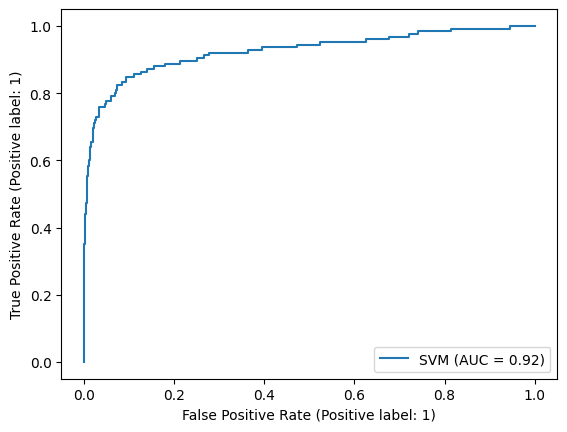

In [ ]:
# Fit the model
svm.fit(X_train, y_train)

#Import the auc and roc_curve functions from sklearn.metrics
from sklearn.metrics import auc, roc_curve, RocCurveDisplay #Import the roc_curve function

# Step 1: Predict the probabilities for the positive class
y_prob_svm = svm.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1

# Step 2: Compute the ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Step 3: Compute the AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Step 4: Plot the ROC curve
plt.figure()

# ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Alternatively, using RocCurveDisplay
RocCurveDisplay.from_estimator(svm, X_test, y_test, name='SVM') #Use the RocCurveDisplay object
plt.show()

Gradient Boosting Machine:


Gradient Boosting Machine Performance:
Accuracy: 0.9385
Precision: 0.7768
Recall: 0.6960
F1 Score: 0.7342
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       900
           1       0.78      0.70      0.73       125

    accuracy                           0.94      1025
   macro avg       0.87      0.83      0.85      1025
weighted avg       0.94      0.94      0.94      1025



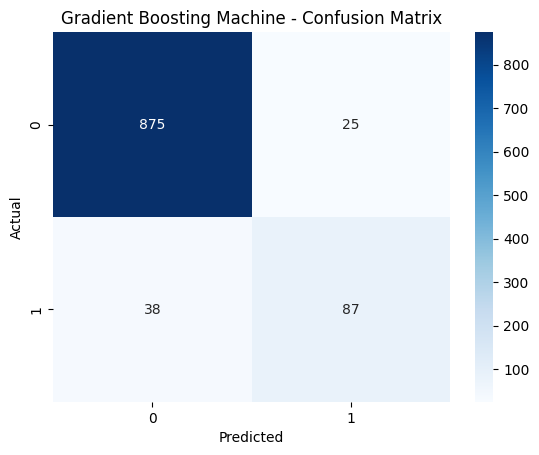

In [ ]:
# Train Gradient Boosting Machine
gbm.fit(X_train, y_train)
evaluate_model(gbm, X_test, y_test, "Gradient Boosting Machine")

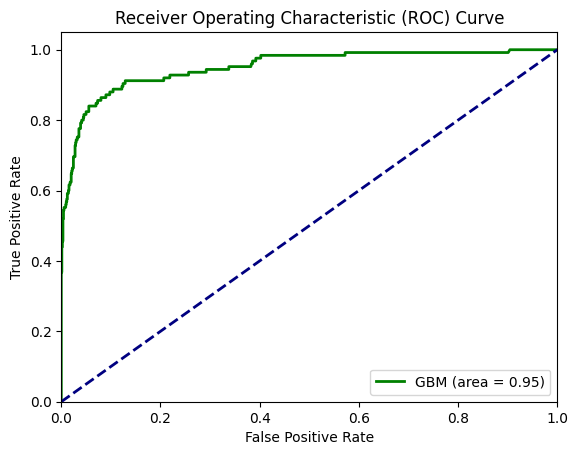

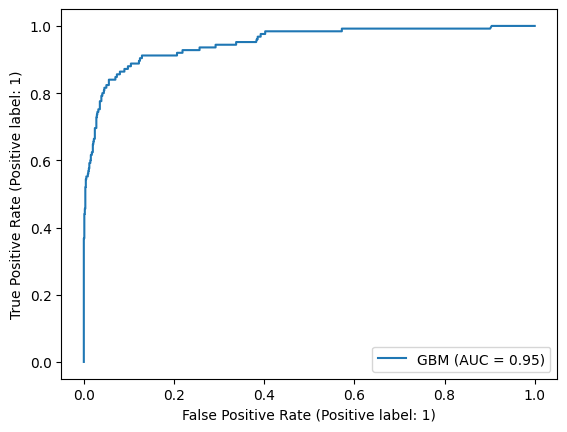

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Initialize the Gradient Boosting Machine model
gbm = GradientBoostingClassifier(random_state=42)

# Fit the model
gbm.fit(X_train, y_train)

# Step 1: Predict the probabilities for the positive class
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1

# Step 2: Compute the ROC curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_prob_gbm)

# Step 3: Compute the AUC
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Step 4: Plot the ROC curve
plt.figure()

# ROC curve for GBM
plt.plot(fpr_gbm, tpr_gbm, color='green', lw=2, label='GBM (area = %0.2f)' % roc_auc_gbm)

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Alternatively, using RocCurveDisplay
RocCurveDisplay.from_estimator(gbm, X_test, y_test, name='GBM')
plt.show()


XGBoost:


XGBoost Performance:
Accuracy: 0.9405
Precision: 0.8019
Recall: 0.6800
F1 Score: 0.7359
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.80      0.68      0.74       125

    accuracy                           0.94      1025
   macro avg       0.88      0.83      0.85      1025
weighted avg       0.94      0.94      0.94      1025



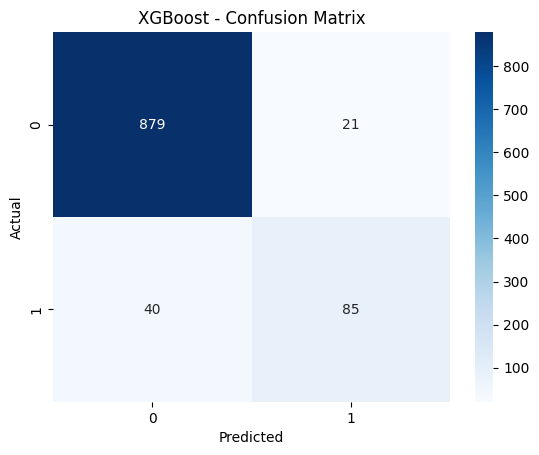

In [ ]:
# Train XGBoost
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


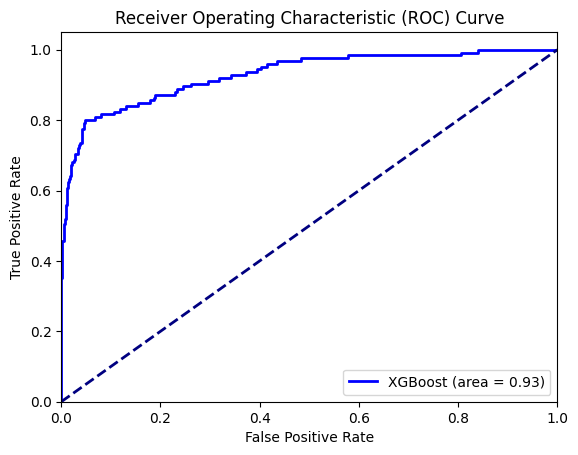

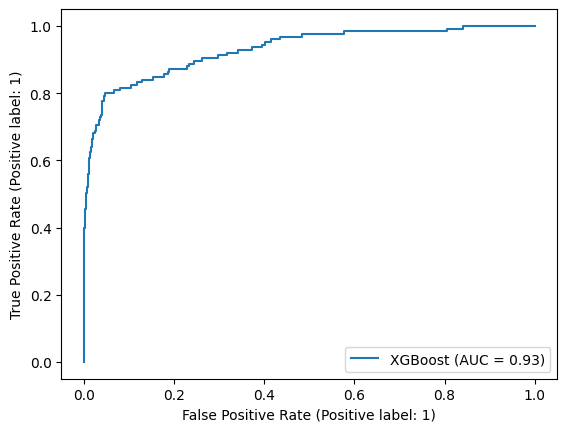

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Step 1: Predict the probabilities for the positive class
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1

# Step 2: Compute the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Step 3: Compute the AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Step 4: Plot the ROC curve
plt.figure()

# ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Alternatively, using RocCurveDisplay
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name='XGBoost')
plt.show()


Deep Learning:

In [ ]:
# -------------- Step 5: Deep Learning Models --------------
# Define a function to create ANN model (for KerasClassifier)
def create_ann_model(input_dim= X_train.shape[1], optimizer='adam', dropout_rate=0.3, neurons=64):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_dim=input_dim))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(neurons//2, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

ANN:


ANN Test Loss: 0.1974, Test Accuracy: 0.9356


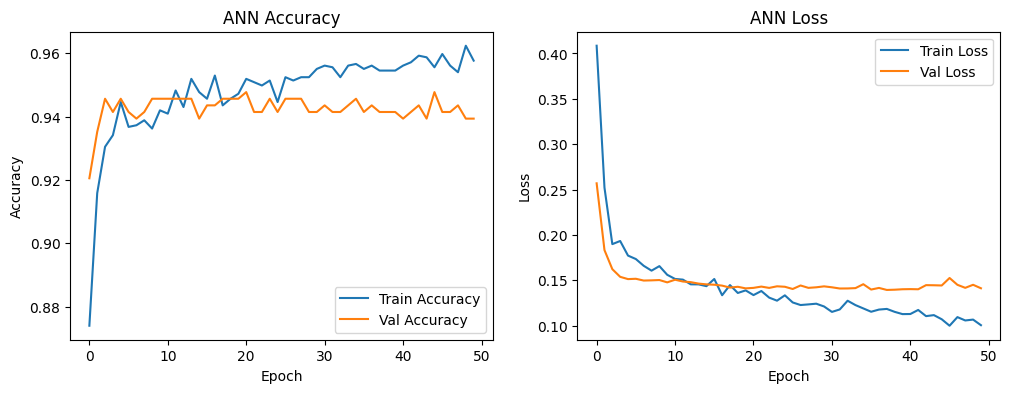

In [ ]:
# Import the necessary modules from Keras
from keras import models
from keras import layers

# Artificial Neural Network (ANN)
ann_model = create_ann_model()
ann_history = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate ANN
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"\nANN Test Loss: {ann_loss:.4f}, Test Accuracy: {ann_accuracy:.4f}")

# Plot ANN training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Val Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Val Loss')
plt.title('ANN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


CNN:


CNN Test Loss: 0.1843, Test Accuracy: 0.9415


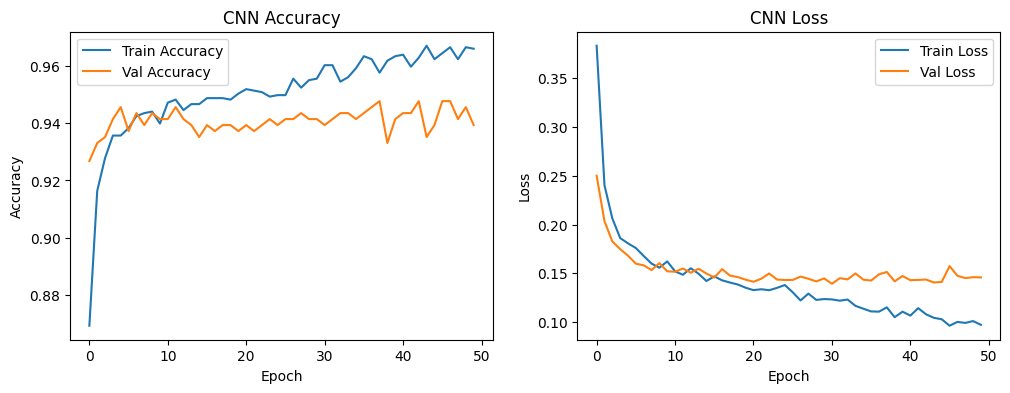

In [ ]:
# Convolutional Neural Network (CNN)
# Note: CNNs are typically used for image data. Here, we'll reshape the data to add a channel dimension.
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

def create_cnn_model(input_shape=(X_train.shape[1],1), optimizer='adam', dropout_rate=0.3, filters=32, kernel_size=3):
    model = models.Sequential()
    model.add(layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"\nCNN Test Loss: {cnn_loss:.4f}, Test Accuracy: {cnn_accuracy:.4f}")

# Plot CNN training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


RNN:


RNN Test Loss: 0.1742, Test Accuracy: 0.9395


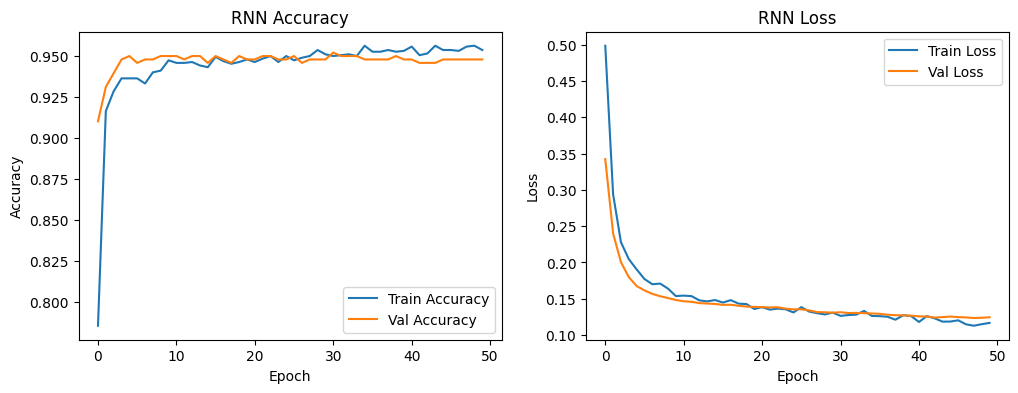

In [ ]:
# Recurrent Neural Network (RNN) - Using SimpleRNN
# Note: RNNs are typically used for sequential data. Here, we'll reshape the data to add a time step dimension.
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

def create_rnn_model(input_shape=(1, X_train.shape[1]), optimizer='adam', dropout_rate=0.3, neurons=64):
    model = models.Sequential()
    model.add(layers.SimpleRNN(neurons, activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = create_rnn_model()
rnn_history = rnn_model.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate RNN
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"\nRNN Test Loss: {rnn_loss:.4f}, Test Accuracy: {rnn_accuracy:.4f}")

# Plot RNN training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Val Loss')
plt.title('RNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7735 - loss: 0.6393 - val_accuracy: 0.9337 - val_loss: 0.4510
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9377 - loss: 0.3941 - val_accuracy: 0.9376 - val_loss: 0.2727
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9326 - loss: 0.2452 - val_accuracy: 0.9405 - val_loss: 0.2098
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9461 - loss: 0.1779 - val_accuracy: 0.9395 - val_loss: 0.1901
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9429 - loss: 0.1676 - val_accuracy: 0.9424 - val_loss: 0.1838
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.1505 - val_accuracy: 0.9415 - val_loss: 0.1809
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9428 - loss: 0.1521 - val_accuracy: 0.9415 - val_loss: 0.1803
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9453 - loss: 0.1390 - val_accuracy: 0.9415 - val_loss

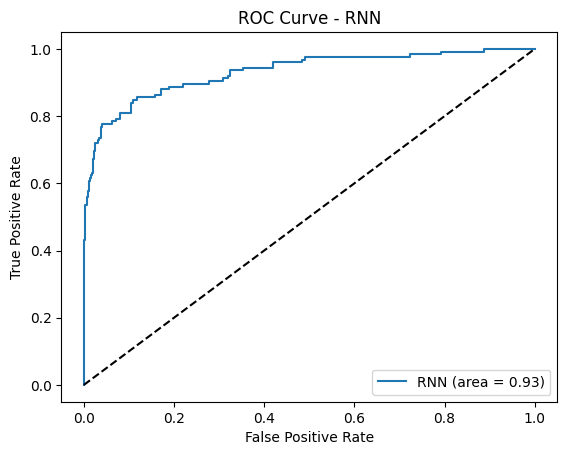

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Reshape data for RNN: (samples, time steps, features)
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# RNN Model (LSTM)
rnn_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

# Predict
y_prob_rnn = rnn_model.predict(X_test_rnn).ravel()

# ROC and AUC
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_prob_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

# Plot ROC
plt.figure()
plt.plot(fpr_rnn, tpr_rnn, label=f'RNN (area = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN')
plt.legend(loc='lower right')
plt.show()


test your hypothesis

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model on the entire dataset
model.fit(X, y)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Isolate the rows where Diabetes = 1
X_test_diabetes_1 = X[y == 1]  # Features where Diabetes = 1
y_test_diabetes_1 = y[y == 1]  # Labels where Diabetes = 1


In [ ]:
from sklearn.metrics import classification_report

# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = model.predict(X_test_diabetes_1)

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset:")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Classification report for Diabetes = 1 subset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79       415

    accuracy                           0.65       415
   macro avg       0.50      0.33      0.40       415
weighted avg       1.00      0.65      0.79       415



Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Initialize and train the Random Forest model on the entire dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]  # Features for Diabetes = 1
y_test_diabetes_1 = y[y == 1]  # Labels for Diabetes = 1


In [ ]:
# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = rf_model.predict(X_test_diabetes_1)

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (Random Forest):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Classification report for Diabetes = 1 subset (Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       415

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Initialize and train the Decision Tree model on the entire dataset
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]  # Features for Diabetes = 1
y_test_diabetes_1 = y[y == 1]  # Labels for Diabetes = 1


In [ ]:
# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = dt_model.predict(X_test_diabetes_1)

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (Decision Tree):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Classification report for Diabetes = 1 subset (Decision Tree):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       415

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



SVM:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Initialize and train the SVM model on the entire dataset
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X, y)


SVC(kernel='linear', random_state=42)

In [ ]:
# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]  # Features for Diabetes = 1
y_test_diabetes_1 = y[y == 1]  # Labels for Diabetes = 1


In [ ]:
# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = svm_model.predict(X_test_diabetes_1)

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (SVM):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Classification report for Diabetes = 1 subset (SVM):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78       415

    accuracy                           0.64       415
   macro avg       0.50      0.32      0.39       415
weighted avg       1.00      0.64      0.78       415



Gradient Boosting Machine:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Initialize and train the Gradient Boosting model on the entire dataset
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X, y)

# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]
y_test_diabetes_1 = y[y == 1]

# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = gbm_model.predict(X_test_diabetes_1)

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (GBM):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Classification report for Diabetes = 1 subset (GBM):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91       415

    accuracy                           0.83       415
   macro avg       0.50      0.41      0.45       415
weighted avg       1.00      0.83      0.91       415



XGBoost:

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Initialize and train the XGBoost model on the entire dataset
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, y)

# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]
y_test_diabetes_1 = y[y == 1]

# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = xgb_model.predict(X_test_diabetes_1)

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (XGBoost):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Classification report for Diabetes = 1 subset (XGBoost):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       415

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



Deep Learning:
ANN:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Build the ANN model
ann_model = Sequential()

# Add layers to the ANN
ann_model.add(Dense(128, input_dim=X.shape[1], activation='relu'))  # First hidden layer with 128 units
ann_model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 units
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]
y_test_diabetes_1 = y[y == 1]

# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = (ann_model.predict(X_test_diabetes_1) > 0.5).astype("int32")

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (ANN):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7816 - loss: 1.7794
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.3134
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.3120
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8942 - loss: 0.2631
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.2496
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.2191
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8941 - loss: 0.2514
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9111 - loss: 0.2638
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9214 - loss: 0.2121
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9182 - loss: 0.2206
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2253
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

CNN:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import classification_report
import numpy as np

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Reshape input data for Conv1D (samples, time_steps, features)
X_reshaped = np.expand_dims(X.values, axis=2)  # Add a dimension for Conv1D input

# Build the CNN model
cnn_model = Sequential()

# Add layers to the CNN
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))  # Conv1D layer
cnn_model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
cnn_model.add(Flatten())  # Flatten the output for the Dense layers
cnn_model.add(Dense(64, activation='relu'))  # Dense layer
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_reshaped, y, epochs=50, batch_size=32, verbose=1)

# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]
y_test_diabetes_1 = y[y == 1]

# Reshape the minority class subset for CNN input
X_test_diabetes_1_reshaped = np.expand_dims(X_test_diabetes_1.values, axis=2)

# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = (cnn_model.predict(X_test_diabetes_1_reshaped) > 0.5).astype("int32")

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (CNN):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8328 - loss: 0.7265
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.3094
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9077 - loss: 0.2580
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8878 - loss: 0.2957
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.2222
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9159 - loss: 0.2280
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9206 - loss: 0.2080
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9248 - loss: 0.2200
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9189 - loss: 0.2181
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9231 - loss: 0.2182
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.2174
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

RNN:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report
import numpy as np

# Separate features and target
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Reshape input data for LSTM (samples, time_steps, features)
X_reshaped = np.expand_dims(X.values, axis=1)  # Add a dimension to treat each sample as a sequence

# Build the RNN (LSTM) model
rnn_model = Sequential()

# Add an LSTM layer
rnn_model.add(LSTM(50, input_shape=(1, X_reshaped.shape[2])))

# Add a Dense layer for output
rnn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(X_reshaped, y, epochs=50, batch_size=32, verbose=1)

# Isolate the rows where Diabetes = 1 (minority class)
X_test_diabetes_1 = X[y == 1]
y_test_diabetes_1 = y[y == 1]

# Reshape the minority class subset for RNN input
X_test_diabetes_1_reshaped = np.expand_dims(X_test_diabetes_1.values, axis=1)

# Predict on the isolated set where Diabetes = 1
y_pred_diabetes_1 = (rnn_model.predict(X_test_diabetes_1_reshaped) > 0.5).astype("int32")

# Evaluate the model's performance on the Diabetes = 1 subset
print("Classification report for Diabetes = 1 subset (RNN):")
print(classification_report(y_test_diabetes_1, y_pred_diabetes_1))


Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8757 - loss: 0.3903
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8833 - loss: 0.3177
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8765 - loss: 0.3157
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8829 - loss: 0.2941
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8930 - loss: 0.2689
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8870 - loss: 0.2799
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8971 - loss: 0.2614
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8840 - loss: 0.2715
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9004 - loss: 0.2492
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9100 - loss: 0.2314
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9081 - loss: 0.2393
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Siamese Neural Network (SNN)

Generating Pairs for the Siamese Network:

In [ ]:
import numpy as np

def create_pairs(X, y):
    pairs = []
    labels = []

    # Get indices for both classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    # Debugging: Print lengths of indices
    print(f"Number of class 0 samples: {len(class_0_indices)}")
    print(f"Number of class 1 samples: {len(class_1_indices)}")

    # Convert DataFrame to NumPy array for indexing with row numbers
    X_array = X.values

    # Create positive pairs (same class)
    for idx in class_1_indices:
        if len(class_1_indices) > 0:
            positive_pair_idx = np.random.choice(class_1_indices)
            # Add pair using the NumPy array
            pairs.append([X_array[idx], X_array[positive_pair_idx]])
            labels.append(1)

    # Create negative pairs (different class)
    for idx in class_1_indices:
        if len(class_0_indices) > 0:
            negative_pair_idx = np.random.choice(class_0_indices)
            # Add pair using the NumPy array
            pairs.append([X_array[idx], X_array[negative_pair_idx]])
            labels.append(0)

    return np.array(pairs), np.array(labels)

# Example: Test the function with a small dataset
pairs_train, labels_train = create_pairs(X, y)

# Debugging: Print first few pairs
print("Sample pairs (first 5):", pairs_train[:5])
print("Sample labels (first 5):", labels_train[:5])


Number of class 0 samples: 3000
Number of class 1 samples: 415
Sample pairs (first 5): [[[ 78.         2.        22.8      145.        72.         5.82
     5.25       3.47       1.4        2.53      13.5        5.01
    60.3        6.2        3.         3.         0.      ]
  [ 37.         1.        26.3      135.        77.         6.53
     5.27       1.83       1.         3.09      31.6        5.45
    73.6        5.7        3.         3.         0.      ]]

 [[ 49.         1.        24.8      136.        90.         5.73
     4.91       1.53       1.28       2.78      12.6        4.81
    74.6        7.17       1.         3.         0.      ]
  [ 66.         2.        25.1      127.        74.         5.82
     6.49       3.14       4.860753   4.860753  37.         4.860753
    63.5        6.1        3.         3.         0.      ]]

 [[ 54.         1.        23.2      105.        75.         5.9
     5.73      11.31       4.860753   4.860753  16.8        4.83
    63.4        6.8 

In [ ]:
# Isolate the rows where Diabetes = 1
X_test_diabetes_1 = X[y == 1]
y_test_diabetes_1 = y[y == 1]


In [ ]:
# Create pairs from the Diabetes = 1 subset (depending on how you structure the pairs in the Siamese network)
# For example, you could compare each `Diabetes = 1` example with other examples
pairs_test_diabetes_1, labels_test_diabetes_1 = create_pairs(X_test_diabetes_1, y_test_diabetes_1)  # Create pairs of data and labels

# Predict on the isolated Diabetes = 1 subset using the Siamese model
y_pred_diabetes_1 = siamese_model.predict([pairs_test_diabetes_1[:, 0], pairs_test_diabetes_1[:, 1]])

# Evaluate performance on the Diabetes = 1 subset
# You might want to threshold predictions as these are similarity scores
y_pred_binary = (y_pred_diabetes_1 > 0.5).astype("int32")

# Assuming labels_test_diabetes_1 is the ground truth for the pairs created from Diabetes = 1
print("Classification report for Diabetes = 1 subset (Siamese Network):")
print(classification_report(labels_test_diabetes_1, y_pred_binary)) # Use labels_test_diabetes_1 for the ground truth

Number of class 0 samples: 0
Number of class 1 samples: 415
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classification report for Diabetes = 1 subset (Siamese Network):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.49      0.66       415

    accuracy                           0.49       415
   macro avg       0.50      0.24      0.33       415
weighted avg       1.00      0.49      0.66       415



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
